Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.03 Convolution and Filtering - Time Domain</font>

# <font color=red>Give it a Try!</font>
# <font color=red>Part 2</font>

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd
from sympy import Symbol, sin, series
from sympy import roots, solve_poly_system
import scipy.special

import warnings
warnings.filterwarnings('ignore')

# Figure size 
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b",linewidth = 1): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

## <font color=red>DSP.03.G2) Convolving a Timeseries</font>

### <font color=red>DSP.03.G2.a) Convolving (moving-average method)</font>

Here's a timeseries consisting of what we'll consider to be 7 Hz signal and 60 Hz noise. (Most countries in the Western Hemisphere use 60 Hz electricity, most other countries use 50 Hz. So, 50 or 60 Hz activity often appears in signals we want to process. Whether 50 or 60 or any other frequency should be treated as signal or noise depends on the context and the purpose of the signal processing.)

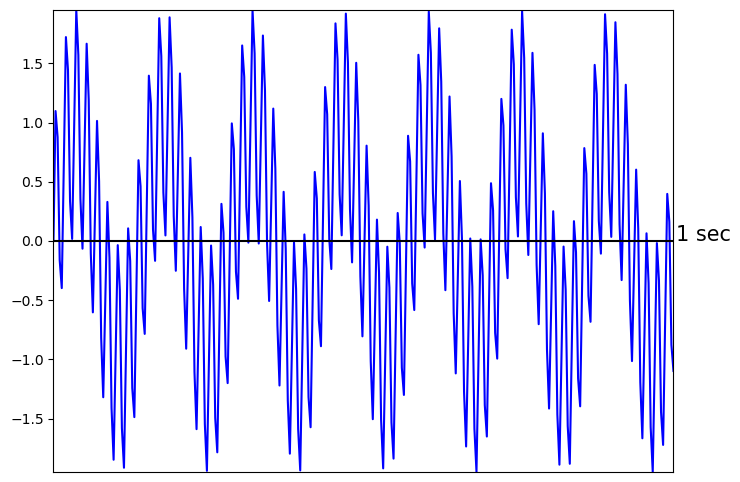

In [2]:
time = np.arange(0,1,1/300)
timeseries = np.sin(2*np.pi * 7 * time) + np.sin(2*np.pi * 60 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Use the moving-average convolution technique to remove 60 Hz activity. (Reminder/hint: think about how many samples you need to span exactly the length of one 60 Hz cycle.) Make sure you overlay the unfiltered and filtered timeseries to show that 60 Hz activity was removed, and write a sentence that
details how you decided what size kernel to use.

### <font color=red>DSP.03.G2.b) Convolving (moving-average method)</font>

Here is the same timeseries as above, just digitized at a different sampling rate.

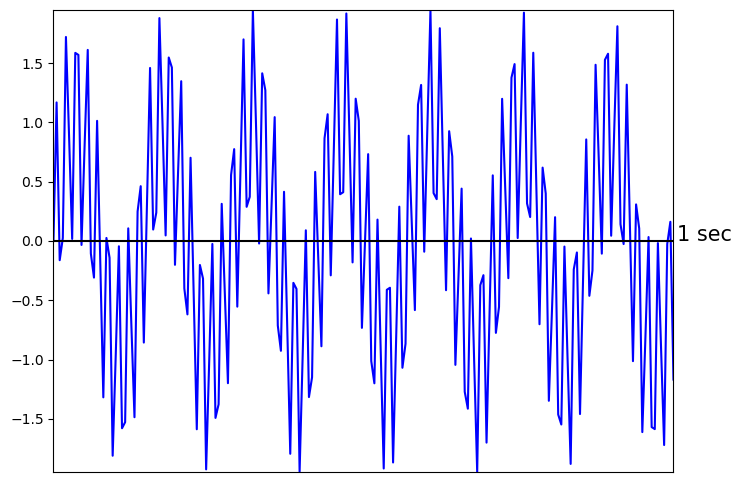

In [3]:
time = np.arange(0,1,1/200)
freq1 = 7
freq2 = 60
timeseries = np.sin(2*np.pi * 7 * time) + np.sin(2*np.pi * 60 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Use the moving-average convolution technique to remove 60 Hz activity. (Reminder/hint: does the change in sampling rate change the number of samples you need to span exactly one 60 Hz cycle?) Make sure you overlay the
unfiltered and filtered timeseries to show that 60 Hz activity was removed, and write a sentence that
details how you decided what size kernel to use.

### <font color=red>DSP.03.G2.c) Convolving (moving-average method)</font>

Here is a new timeseries.

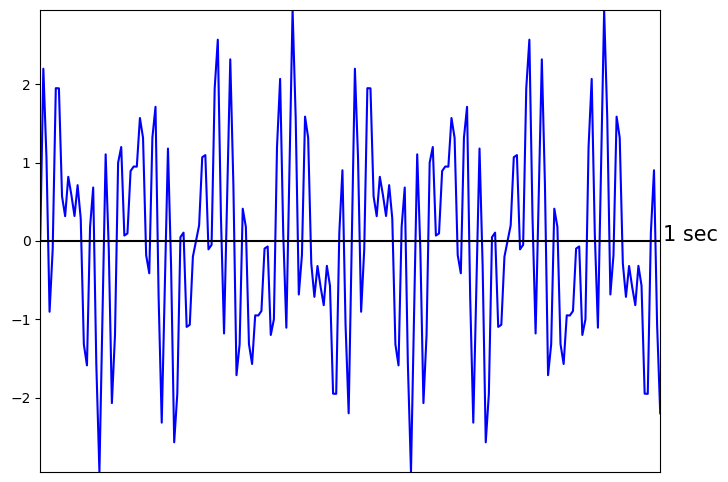

In [4]:
time = np.arange(0,1,1/200)
freq1 = 8
freq2 = 40
freq3 = 50
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time) + np.sin(2*np.pi * freq3 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Use the moving-average convolution technique to remove as much 40 Hz activity as possible. Overlay
the unfiltered and filtered timeseries and write a sentence that details how you decided to set the
length of the kernel to optimally remove 40 Hz activity.

Finally, compare the powerspectrum of the unfiltered and filtered timeseries and write a sentence commenting
on the amount of 40 Hz versus 50 Hz activity removed. 

### <font color=red>DSP.03.G2.d) High- versus low-pass filters</font>

Look at this timeseries.

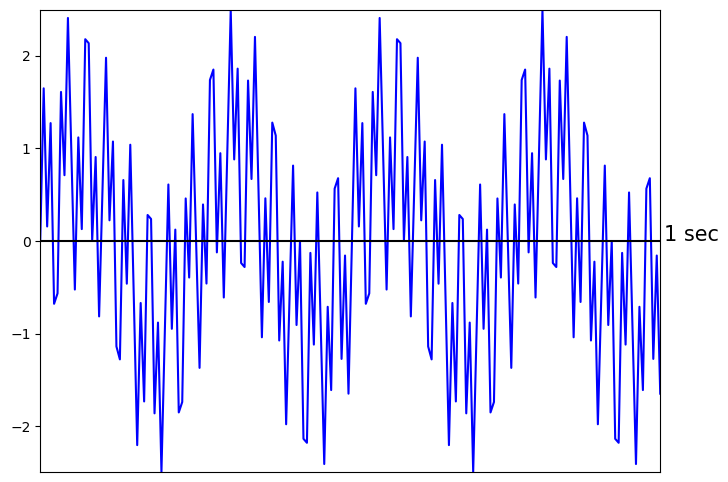

In [5]:
time = np.arange(0,1,1/180)
freq1 = 4
freq2 = 30
freq3 = 70
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time) + np.sin(2*np.pi * freq3 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Use the moving-average convolution technique to remove as much 30 Hz activity as possible. Overlay
the unfiltered and filtered timeseries and write a sentence that details how you decided to set the
length of the kernel to optimally remove 30 Hz activity.

Finally, compare the power spectrum of the unfiltered and filtered timeseries and write a sentence commenting
on the amount of 30 Hz versus 70 Hz activity removed.

### <font color=red>DSP.03.G2.e) Convolving (moving-average method)</font>

Look at this timeseries.

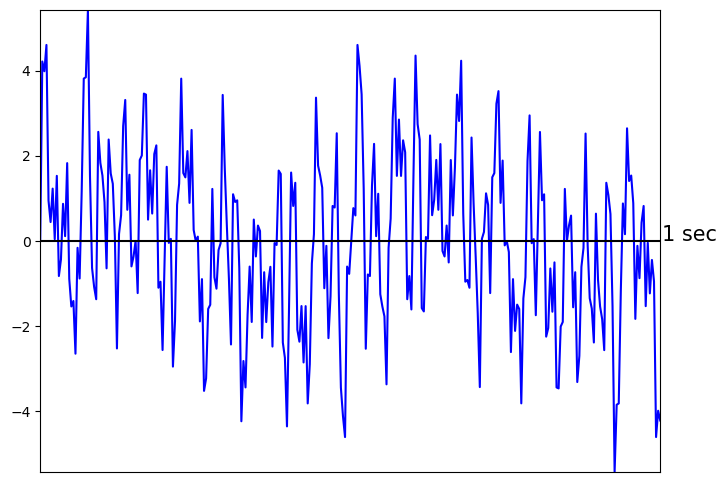

In [6]:
time = np.arange(0,1,1/300)
freq1 = 2
freq2 = 14
freq3 = 18
freq4 = 30
freq5 = 32
freq6 = 45
freq7 = 55
freq8 = 120

timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time) + np.sin(2*np.pi * freq3 * time) \
          + np.sin(2*np.pi * freq4 * time) + np.sin(2*np.pi * freq5 * time) + np.sin(2*np.pi * freq6 * time) \
          + np.sin(2*np.pi * freq7 * time) + np.sin(2*np.pi * freq8 * time) 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Convolve the timeseries with a moving average kernel of size two.

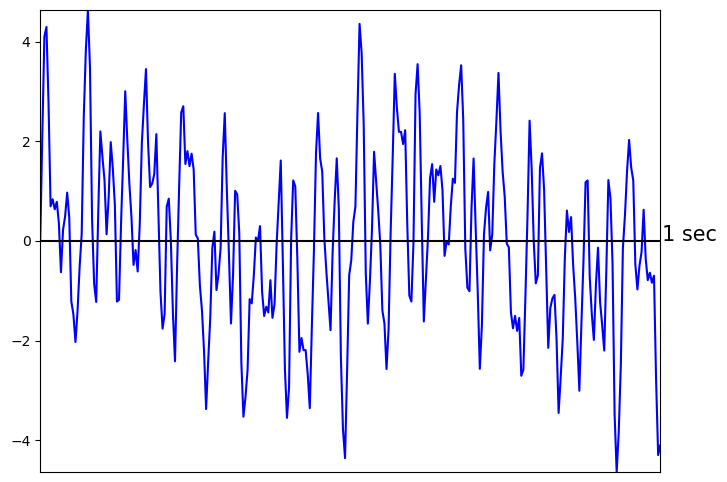

In [7]:
from scipy import signal

kernel = 1/2 * np.ones(2)
newydata = signal.convolve(timeseries,kernel,mode='same')

make_plot_1(time,newydata)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Plot and compare the powerspectrum of the unfiltered and filtered timeseries.

What type of filter was applied? (Hint: you have a 50/50 chance of guessing the correct term, but we hope you don't have to guess.)

### <font color=red>DSP.03.G2.f) High- versus low-pass filters</font>

Look at this timeseries.

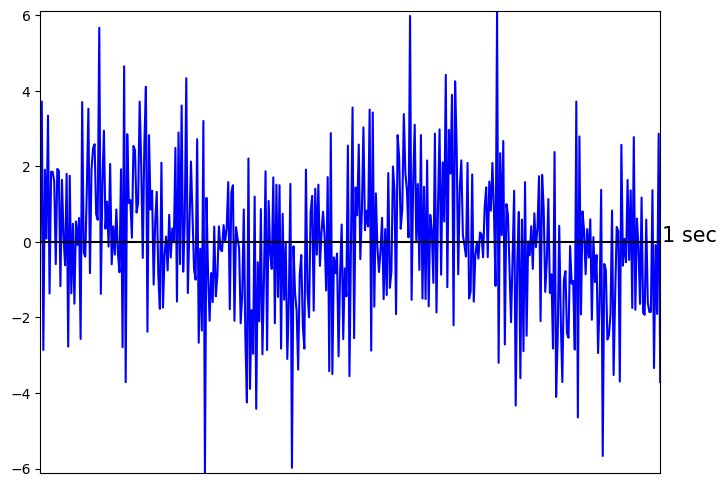

In [8]:
time = np.arange(0,1,1/400)
freq1 = 2
freq2 = 14
freq3 = 108
freq4 = 120
freq5 = 150
freq6 = 172
freq7 = 180
freq8 = 195

timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time) + np.sin(2*np.pi * freq3 * time) \
          + np.sin(2*np.pi * freq4 * time) + np.sin(2*np.pi * freq5 * time) + np.sin(2*np.pi * freq6 * time) \
          + np.sin(2*np.pi * freq7 * time) + np.sin(2*np.pi * freq8 * time) 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Convolve the timeseries with a moving-average kernel of size four.

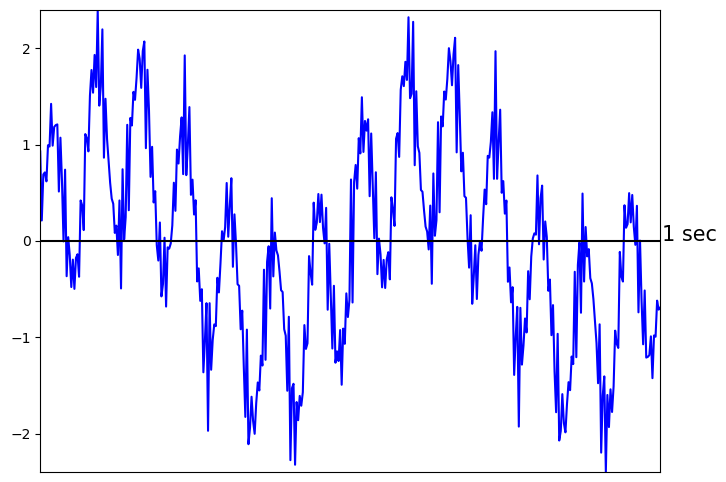

In [9]:
from scipy import signal

kernel = 1/4 * np.ones(4)
newydata = signal.convolve(timeseries,kernel,mode='same')

make_plot_1(time,newydata)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Plot and compare the powerspectrum of the unfiltered and filtered timeseries. What type of filter was applied?

### <font color=red>DSP.03.G2.g) Convolving (just a big word for multiplying and then adding the products)</font>

The text below describes how to design a nonrecursive filter (a.k.a. a Finite Impulse Response (FIR)
filter).

Let vector K (the kernel) consist of 2j+1 weights (subscripted -j to +j) that will be used to compute
output vector Filteredt (filtered timeseries) from input vector Unfilteredt (unfiltered timeseries).

Reminder: With the subscripts ranging from -j to +j, you'll use the same number of original data points on each side of the data point being filtered, plus the point being filtered, to compute a weighted sum of the 2j+1 data points. For example, for a 5-weight filter, the 5 weights in the kernel will be applied to 5 data points at a time, centered on the point being filtered. j will have the values -2, -1, 0, 1, and 2. The value produced by the convolution of the 5-weight kernel and those 5 data points will be the filtered version of the data point being filtered. You'll move that kernel along the vector of original data points (Unfilteredt) to create the vector of filtered data points (Filteredt).

In the type of filter we're discussing, the weights in the kernel are symmetrical: the weight at -j and the weight at +j are the same, the weight at -2j and the weight at +2j are the same, etc. That's not a requirement of convolution, but it accomplishes some nice things in terms of filter design. (Filter design means selecting weights based on the desired impact on the timeseries being filtered.) One can design a filter with asymmetrical weights and/or apply the weights to an asymmetrical number of data points before and after the data point being filtered, but we're not discussing those or other options in filter design.

More reminders, and repeating ourselves a bit: Typically,
Filteredt and Unfilteredt are the same length (Filteredt may be a bit shorter, as some filters are
not applicable near the ends of the time series), and the kernel K is much shorter. As shown above, the
sample period (distance in time between the points in Unfilteredt), the number of weights, and the
values of those weights affect the gain function of the filter. 2j+1 input data points (a portion of vector
Unfilteredt) will be included in the computation of each filtered output point (to be stored in vector
Filteredt). Each value in Filteredt is computed by convolving the 2j+1 weights in the kernel K with 2j+1
values in Unfilteredt. Convolution is the sum of the cross-products of the kernel weights and corresponding
Unfilteredt values (i.e., the dot product):
    
Filteredt = $\sum\limits_{i=-j}^{j}$ Ki Unfilteredt + i

This is the type of filter we applied for the moving average filters. The variable 'K' is the kernel width
(e.g., 5 values, or 11 values, or 3007 values, or whatever you choose) that is applied.

In the moving-average filters we’ve discussed so far, all the values comprising the vector ‘K’ (the
weights) were the same. Do all values comprising the vector 'K' have to be the same?

### <font color=red>DSP.03.G2.h) Convolving (just a big word for multiplying and then adding the products)</font>

The text below describes how to design a nonrecursive filter (a.k.a. a Finite Impulse Response (FIR)
filter).

Let vector K (the kernel) consist of 2j+1 weights (subscripted -j to +j) that will be used to compute
output vector Filteredt (filtered timeseries) from input vector Unfilteredt (unfiltered timeseries). Typically,
Filteredt and Unfilteredt are the same length (Filteredt may be a bit shorter, as some filters are
not applicable near the ends of the time series), and the kernel K is much shorter. As shown above, the
sample period (distance in time between the points in Unfilteredt), the number of weights, and the
values of those weights affect the gain function of the filter. 2j+1 input data points (a portion of vector
Unfilteredt) will be included in the computation of each filtered output point (to be stored in vector
Filteredt). Each value in Filteredt is computed by convolving the 2j+1 weights in the kernel K with 2j+1
values in Unfilteredt. Convolution is the sum of the cross-products of the kernel weights and corresponding Unfilteredt values (i.e., the dot product):

Filteredt = $\sum\limits_{i=-j}^{j}$ Ki Unfilteredt + i

The text above says that, "Typically, Filteredt and Unfilteredt are the same length (Filteredt may
be a bit shorter, as some filters are not applicable near the ends of the timeseries)...". Write a sentence or two describing why Filteredt may be a bit shorter than Unfilteredt. In particular, why do we often
run into problems near the ends of the timeseries? (There are solutions to those problems, not perfect solutions, beyond the scope of what we're discussing here.)

### <font color=red>DSP.03.G2.i) Convolving (just a big word for multiplying and then adding the products)</font>

In the text above, it is noted that the kernel consists of 2j+1 weights.

Notice that nothing in the text says the kernel weights have to be the same (though they are for the moving-average filter).

Notice that nothing in the text says the kernel weights have to be the reciprocal of the length of the
timeseries (though they are for the moving-average filter).

Look at the timeseries examined above.

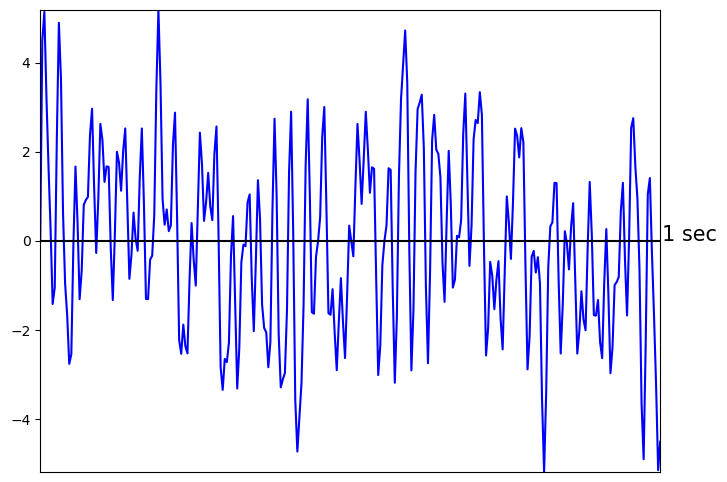

In [10]:
time = np.arange(0,1,1/300)
freq1 = 2
freq2 = 12
freq3 = 16
freq4 = 33
freq5 = 38
freq6 = 40
freq7 = 43
freq8 = 75

timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time) + np.sin(2*np.pi * freq3 * time) \
          + np.sin(2*np.pi * freq4 * time) + np.sin(2*np.pi * freq5 * time) + np.sin(2*np.pi * freq6 * time) \
          + np.sin(2*np.pi * freq7 * time) + np.sin(2*np.pi * freq8 * time)  

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Create your very own kernel with unequal weights and use this kernel to filter the timeseries.
Overlay the power spectrum and comment on the effect of your filter. (Feel free to try any pattern of weights you'd like - symmetrical, or rising linearly, or consisting of a sine wave, or whatever - but then try to understand why your custom filter did what it did.)